In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as st

np.set_printoptions(linewidth=180)

In [2]:
import sympy as sp

# Define the variables
a, b, c, d, e, f, g, h, i, j = sp.symbols('a b c d e f g h i j')
x, y = sp.symbols('x y')


# solution : collé a l'indentité en x, collé à la fonction zero en y, dérivable 4 fois
# Define the equations

eq1 = a*x**9 + b*x**8 + c*x**7 + d*x**6 + e*x**5 + f*x**4 + g*x**3 + h*x**2 + (i-1)*x + j
eq2 = 9*a*x**8 + 8*b*x**7 + 7*c*x**6 + 6*d*x**5 + 5*e*x**4 + 4*f*x**3 + 3*g*x**2 + 2*h*x + i - 1
eq3 = 72*a*x**7 + 56*b*x**6 + 42*c*x**5 + 30*d*x**4 + 20*e*x**3 + 12*f*x**2 + 6*g*x + 2*h
eq4 = 504*a*x**6 + 336*b*x**5 + 210*c*x**4 + 120*d*x**3 + 60*e*x**2 + 24*f*x + 6*g
eq5 = 3024*a*x**5 + 1680*b*x**4 + 840*c*x**3 + 360*d*x**2 + 120*e*x + 24*f

eq6 = a*y**9 + b*y**8 + c*y**7 + d*y**6 + e*y**5 + f*y**4 + g*y**3 + h*y**2 + i*y + j
eq7 = 9*a*y**8 + 8*b*y**7 + 7*c*y**6 + 6*d*y**5 + 5*e*y**4 + 4*f*y**3 + 3*g*y**2 + 2*h*y + i
eq8 = 72*a*y**7 + 56*b*y**6 + 42*c*y**5 + 30*d*y**4 + 20*e*y**3 + 12*f*y**2 + 6*g*y + 2*h
eq9 = 504*a*y**6 + 336*b*y**5 + 210*c*y**4 + 120*d*y**3 + 60*e*y**2 + 24*f*y + 6*g
eq10 = 3024*a*y**5 + 1680*b*y**4 + 840*c*y**3 + 360*d*y**2 + 120*e*y + 24*f

# Solve the system of equations
solution = sp.solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10), (a, b, c, d, e, f, g, h, i, j))

print(solution)

print(solution[a].subs([(x,0.5),(y,0.6)]))

{a: (35*x + 35*y)/(x**9 - 9*x**8*y + 36*x**7*y**2 - 84*x**6*y**3 + 126*x**5*y**4 - 126*x**4*y**5 + 84*x**3*y**6 - 36*x**2*y**7 + 9*x*y**8 - y**9), b: (-160*x**2 - 310*x*y - 160*y**2)/(x**9 - 9*x**8*y + 36*x**7*y**2 - 84*x**6*y**3 + 126*x**5*y**4 - 126*x**4*y**5 + 84*x**3*y**6 - 36*x**2*y**7 + 9*x*y**8 - y**9), c: (280*x**3 + 980*x**2*y + 980*x*y**2 + 280*y**3)/(x**9 - 9*x**8*y + 36*x**7*y**2 - 84*x**6*y**3 + 126*x**5*y**4 - 126*x**4*y**5 + 84*x**3*y**6 - 36*x**2*y**7 + 9*x*y**8 - y**9), d: (-224*x**4 - 1484*x**3*y - 2464*x**2*y**2 - 1484*x*y**3 - 224*y**4)/(x**9 - 9*x**8*y + 36*x**7*y**2 - 84*x**6*y**3 + 126*x**5*y**4 - 126*x**4*y**5 + 84*x**3*y**6 - 36*x**2*y**7 + 9*x*y**8 - y**9), e: (70*x**5 + 1120*x**4*y + 3220*x**3*y**2 + 3220*x**2*y**3 + 1120*x*y**4 + 70*y**5)/(x**9 - 9*x**8*y + 36*x**7*y**2 - 84*x**6*y**3 + 126*x**5*y**4 - 126*x**4*y**5 + 84*x**3*y**6 - 36*x**2*y**7 + 9*x*y**8 - y**9), f: (-350*x**5*y - 2240*x**4*y**2 - 3640*x**3*y**3 - 2240*x**2*y**4 - 350*x*y**5)/(x**9 - 9*x**

In [15]:
degree = 15

numEquations = degree+1

symbol_tab = sp.symbols('a0:%d'%numEquations)
x, y = sp.symbols('x y')

eq_tab = [0]*numEquations

new_factor = 1
for ii in range(int(numEquations/2)):
    for jj in range(numEquations):
        # if ii == 0:
        #     factor = 1
        # else:
        factor = 1
        for kk in range(-ii+1,1):
            factor = factor*(jj+kk)      
        eq_tab[ii] += factor*symbol_tab[jj]*x**(jj-ii)
eq_tab[0] = eq_tab[0]-x
eq_tab[1] = eq_tab[1]-1

for ii in range(int(numEquations/2)):
    for jj in range(numEquations):
        if ii == 0:
            factor = 1
        else:
            factor = 1
            for kk in range(-ii+1,1):
                factor = factor*(jj+kk)      
        eq_tab[ii+int(numEquations/2)] += factor*symbol_tab[jj]*y**(jj-ii)


solution_tab = sp.solve(eq_tab, symbol_tab)
print(eq_tab)
print(symbol_tab)
print(solution_tab)
# print(solution_tab[symbol_tab[9]])

[a0 + a1*x + a10*x**10 + a11*x**11 + a12*x**12 + a13*x**13 + a14*x**14 + a15*x**15 + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9 - x, a1 + 10*a10*x**9 + 11*a11*x**10 + 12*a12*x**11 + 13*a13*x**12 + 14*a14*x**13 + 15*a15*x**14 + 2*a2*x + 3*a3*x**2 + 4*a4*x**3 + 5*a5*x**4 + 6*a6*x**5 + 7*a7*x**6 + 8*a8*x**7 + 9*a9*x**8 - 1, 90*a10*x**8 + 110*a11*x**9 + 132*a12*x**10 + 156*a13*x**11 + 182*a14*x**12 + 210*a15*x**13 + 2*a2 + 6*a3*x + 12*a4*x**2 + 20*a5*x**3 + 30*a6*x**4 + 42*a7*x**5 + 56*a8*x**6 + 72*a9*x**7, 720*a10*x**7 + 990*a11*x**8 + 1320*a12*x**9 + 1716*a13*x**10 + 2184*a14*x**11 + 2730*a15*x**12 + 6*a3 + 24*a4*x + 60*a5*x**2 + 120*a6*x**3 + 210*a7*x**4 + 336*a8*x**5 + 504*a9*x**6, 5040*a10*x**6 + 7920*a11*x**7 + 11880*a12*x**8 + 17160*a13*x**9 + 24024*a14*x**10 + 32760*a15*x**11 + 24*a4 + 120*a5*x + 360*a6*x**2 + 840*a7*x**3 + 1680*a8*x**4 + 3024*a9*x**5, 30240*a10*x**5 + 55440*a11*x**6 + 95040*a12*x**7 + 154440*a13*x**8 + 240240*a14*x**9 + 360360*a1

In [16]:
alpha = 0.5
beta = 1.0

a_d = solution[a].subs([(x,alpha),(y,beta)])
b_d = solution[b].subs([(x,alpha),(y,beta)])
c_d = solution[c].subs([(x,alpha),(y,beta)])
d_d = solution[d].subs([(x,alpha),(y,beta)])
e_d = solution[e].subs([(x,alpha),(y,beta)])
f_d = solution[f].subs([(x,alpha),(y,beta)])
g_d = solution[g].subs([(x,alpha),(y,beta)])
h_d = solution[h].subs([(x,alpha),(y,beta)])
i_d = solution[i].subs([(x,alpha),(y,beta)])
j_d = solution[j].subs([(x,alpha),(y,beta)])

a_g = solution[a].subs([(x,-alpha),(y,-beta)])
b_g = solution[b].subs([(x,-alpha),(y,-beta)])
c_g = solution[c].subs([(x,-alpha),(y,-beta)])
d_g = solution[d].subs([(x,-alpha),(y,-beta)])
e_g = solution[e].subs([(x,-alpha),(y,-beta)])
f_g = solution[f].subs([(x,-alpha),(y,-beta)])
g_g = solution[g].subs([(x,-alpha),(y,-beta)])
h_g = solution[h].subs([(x,-alpha),(y,-beta)])
i_g = solution[i].subs([(x,-alpha),(y,-beta)])
j_g = solution[j].subs([(x,-alpha),(y,-beta)])



def fp(x):
    if x <= -beta :
        return 0
    if -beta <= x <= -alpha:
        return a_g*x**9 + b_g*x**8 + c_g*x**7 + d_g*x**6 + e_g*x**5 + f_g*x**4 + g_g*x**3 + h_g*x**2 + i_g*x + j_g
    if -alpha <= x <= alpha:
        return x
    if alpha <= x <= beta:
        return a_d*x**9 + b_d*x**8 + c_d*x**7 + d_d*x**6 + e_d*x**5 + f_d*x**4 + g_d*x**3 + h_d*x**2 + i_d*x + j_d
    if beta <= x :
        return 0

In [17]:
alpha = 0.5
beta = 1.0

coef_d = [0]*numEquations
coef_g = [0]*numEquations

for ind in range(numEquations):
    coef_d[ind]=solution_tab[symbol_tab[ind]].subs([(x,alpha),(y,beta)])
    coef_g[ind]=solution_tab[symbol_tab[ind]].subs([(x,-alpha),(y,-beta)])
# print(solution[symbol_tab[0]])




def fp_tab(x):
    if x <= -beta :
        return 0
    if -beta <= x <= -alpha:
        # return a_g*x**9 + b_g*x**8 + c_g*x**7 + d_g*x**6 + e_g*x**5 + f_g*x**4 + g_g*x**3 + h_g*x**2 + i_g*x + j_g
        res = 0
        for ii in range(numEquations):
            res = res + coef_g[ii]*x**(ii)
        return res
        # return a_g*x**9 + b_g*x**8 + c_g*x**7 + d_g*x**6 + e_g*x**5 + f_g*x**4 + g_g*x**3 + h_g*x**2 + i_g*x + j_g 
        # return res
    if -alpha <= x <= alpha:
        return x
    if alpha <= x <= beta:
        # return a_d*x**9 + b_d*x**8 + c_d*x**7 + d_d*x**6 + e_d*x**5 + f_d*x**4 + g_d*x**3 + h_d*x**2 + i_d*x + j_d
        res = 0
        for ii in range(numEquations):
            res = res + coef_d[ii]*x**(ii)
        return res
    if beta <= x :
        return 0
    


0.549303322492051


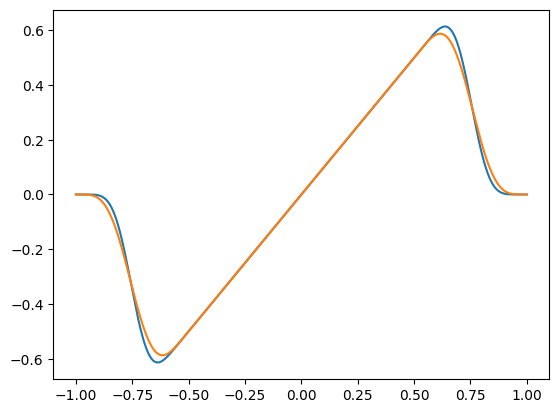

In [18]:

print(fp(0.55))

xx = np.linspace(-1, 1, 1000)
pfxx = np.empty(np.shape(xx))
pfxx2 = np.empty(np.shape(xx))

for ii,v in enumerate(xx):
    pfxx[ii] = fp_tab(v) # degre 15
    pfxx2[ii] = fp(v) #degre 9


plt.plot(xx,pfxx)
plt.plot(xx,pfxx2)
plt.show()

# plt.plot(X_states_space,fp(X_states_space,0.5,0.6))





